<br>
<br>
<br>
<br>

# Part 2 : Timing Analyze

<br>
<br>
<br>
<br>

<br>
<br>
<br>

# Import libarary

<br>
<br>
<br>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from GlobalFunction import *


pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('float_format', '{:f}'.format)

sns.set(style="white", color_codes=True)

<br>
<br>
<br>

# Read The Data

<br>
<br>
<br>

In [2]:
df = readCSV("cleanData.csv")
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09 00:00:00,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01 00:00:00,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26 00:00:00,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16 00:00:00,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01 00:00:00,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1


<br>
<br>

## Describe
<br>
<br>

In [3]:
getDescribe(df)

,attribute,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value
0,count,331672.000000,331672,331672,331672,331672,331672,331672,331672.000000,331672,331672.000000,331672.000000,331672.000000
1,unique,NaN,329594,159,15,3102,331252,2,NaN,23,NaN,NaN,NaN
2,top,NaN,New EP/Music Development,Product Design,Film & Video,2014-08-08 00:00:00,2013-10-28 23:07:36,failed,NaN,US,NaN,NaN,NaN
3,freq,NaN,15,18680,56526,612,2,197716,NaN,261358,NaN,NaN,NaN
4,mean,1074270473.552027,NaN,NaN,NaN,NaN,NaN,NaN,116.382580,NaN,9943.549278,41509.658749,0.403881
5,std,619193075.107324,NaN,NaN,NaN,NaN,NaN,NaN,965.431577,NaN,96733.367226,1108934.642072,0.490675
6,min,5971.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.010000,0.000000
7,25%,537171096.500000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,50.000000,2000.000000,0.000000
8,50%,1074574892.500000,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,NaN,788.000000,5000.000000,0.000000
9,75%,1609843457.750000,NaN,NaN,NaN,NaN,NaN,NaN,63.000000,NaN,4608.000000,15000.000000,1.000000


<br>
<br>
<br>
<br>

# Part 2.1 : Create Featuers

<br>
<br>
<br>
<br>

In [4]:
df.deadline = df.deadline.astype('datetime64')
df.launched = df.launched.astype('datetime64')

In [5]:
df = df.assign(hour=df.launched.dt.hour,
               day=df.launched.dt.day,
               month=df.launched.dt.month,
               year=df.launched.dt.year,
               weekday=df.launched.dt.weekday)

In [6]:
df.head()

,ID,name,category,main_category,deadline,launched,state,backers,country,pledged,goal,state_value,hour,day,month,year,weekday
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.000000,1533.950000,0,12,11,8,2015,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.000000,30000.000000,0,4,2,9,2017,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.000000,45000.000000,0,0,12,1,2013,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.000000,5000.000000,0,3,17,3,2012,5
4,1000014025,Monarch Espresso Bar,Restaurants,Food,2016-04-01,2016-02-26 13:38:27,successful,224,US,52375.000000,50000.000000,1,13,26,2,2016,4


<br>
<br>

## create column duration of projects

<br>
<br>

now we add column of duration of project from launched date to deadline date

In [7]:
df['duration'] = df.apply(lambda row : (row.deadline - row.launched).days + 1, axis = 1)

In [8]:
writeCSV(df,'timingData.csv')
trainData = splitData(df,'timingTrainData.csv','timingTestData.csv')
trainData.shape

(238961, 18)

<br>
<br>
<br>
<br>

# Part 2.2 : Data Visualization

<br>
<br>
<br>
<br>

In [10]:
def plotColumnStateCompare(data,column, hue = 'state'):
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    plt.subplot(212)
    ax = sns.countplot(x=column, hue=hue, data=data , palette='GnBu' )
    ax.set_title("Projects count by " + str(column), fontsize=22)
    ax.set_xlabel(str(column), fontsize=17)
    ax.set_ylabel("Count", fontsize=17),
    ax.legend(loc='upper right')
    plt.subplots_adjust(hspace = 0.4)
    plt.show()


<br>
<br>

## Plotting compare succuss or fail by month

<br>
<br>

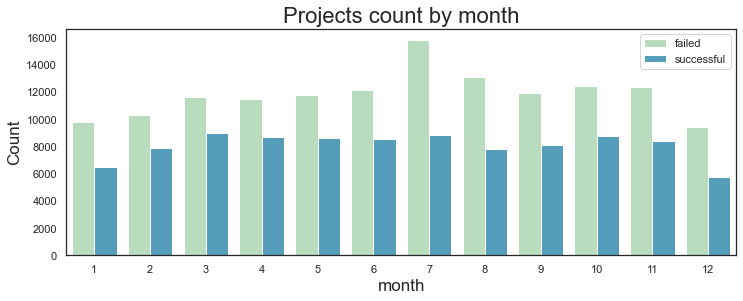

In [11]:
plotColumnStateCompare(trainData,'month')

<br>
<br>

## Plotting compare succuss or fail by weekday

<br>
<br>


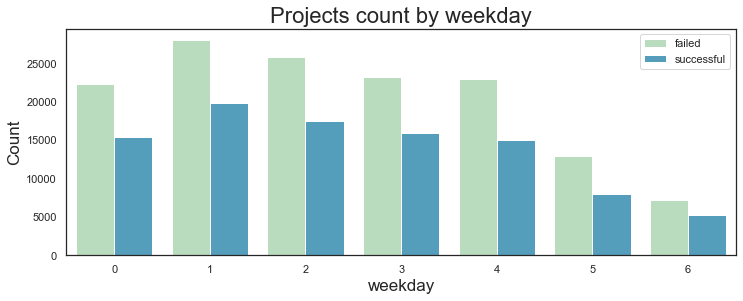

In [12]:
plotColumnStateCompare(trainData,'weekday')

<br>
<br>


## Plotting histogram

<br>
<br>


C:\Users\shova\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shova\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\shova\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\shova\Anaconda3\lib\site-packages\pandas\plotting\_matpl

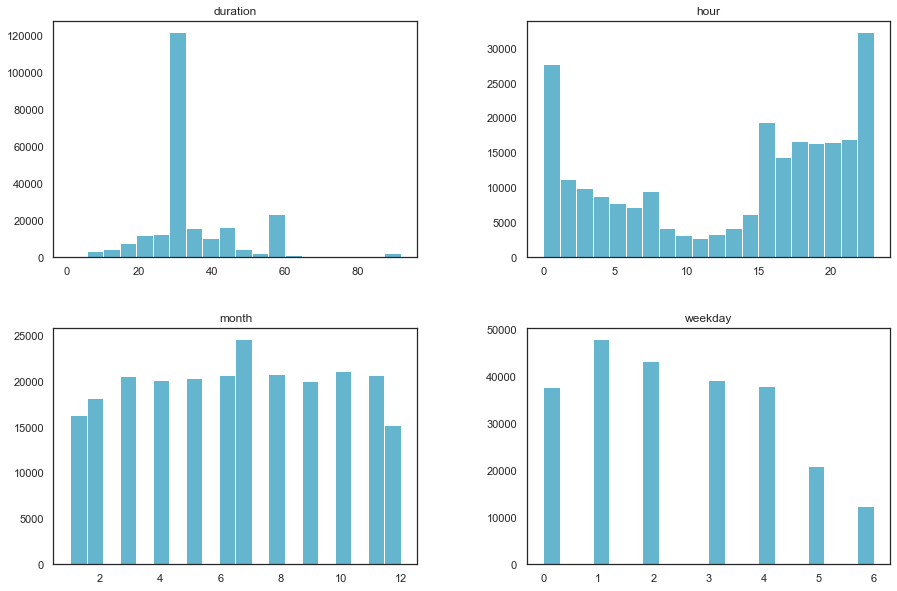

In [13]:
trainData[['hour','duration','month','weekday']].copy().hist(bins =20,grid = False,figsize=(15,10), color = 'c' )
plt.show()

<br>
<br>


## Plotting pair plot

<br>
<br>


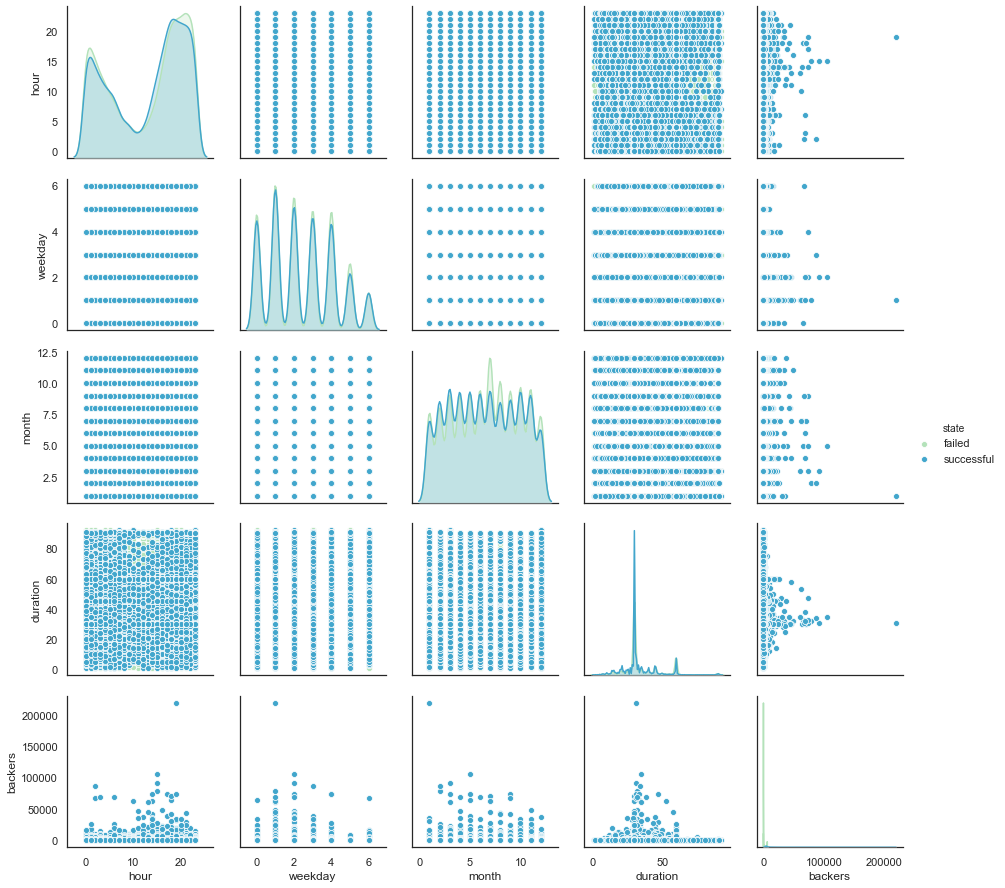

In [14]:
data = trainData[['state','hour','weekday','month','duration','backers']].copy()
sns.pairplot(data, hue='state', palette = 'GnBu')
plt.show()

<br>
<br>


## Check how timing impact on num of backers 

<br>
<br>


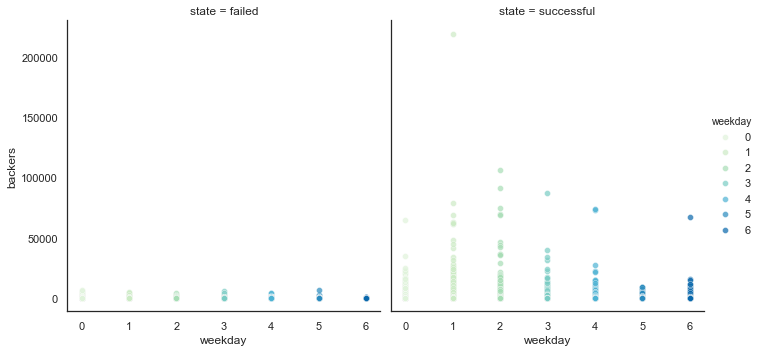

In [15]:
g = sns.FacetGrid(trainData, col="state", hue="weekday", palette='GnBu', height=5)
g.map(plt.scatter, "weekday", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

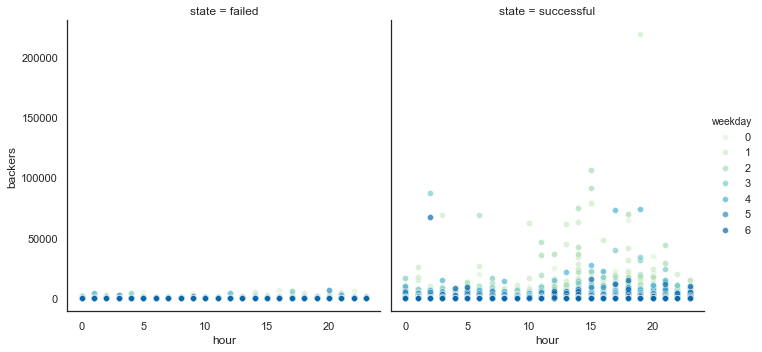

In [16]:
g = sns.FacetGrid(trainData, col="state", hue="weekday", palette='GnBu', height=5)
g.map(plt.scatter, "hour", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

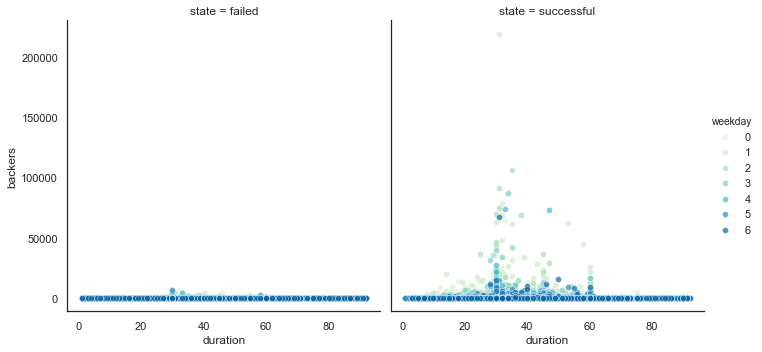

In [17]:
g = sns.FacetGrid(trainData, col="state", hue="weekday", palette='GnBu', height=5)
g.map(plt.scatter, "duration", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

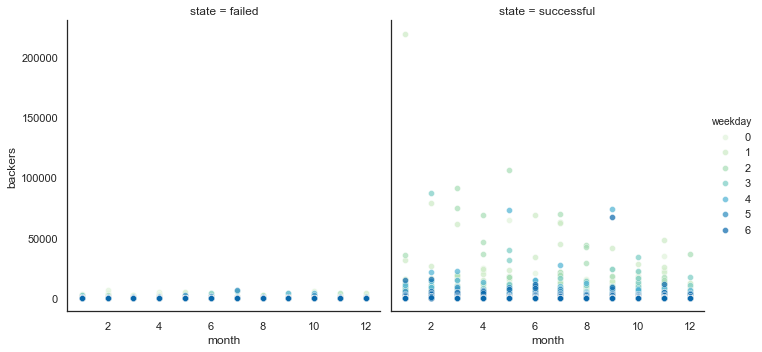

In [18]:
g = sns.FacetGrid(trainData, col="state", hue="weekday", palette='GnBu'
                  , height=5)
g.map(plt.scatter, "month", "backers", alpha=.7, linewidth=.5, edgecolor="white")
g.add_legend()
plt.show()

<br>
<br>


## plot correlation

<br>
<br>


In [19]:
plotCorr(trainData)

,ID,backers,pledged,goal,state_value,hour,day,month,year,weekday,duration
ID,1,0.00036,0.00039,0.0026,-0.0016,0.0024,0.0035,0.0012,-0.0014,-0.0017,0.0031
backers,0.00036,1,0.77,0.0073,0.11,0.0084,-0.0022,-0.0039,0.013,-0.021,-0.0018
pledged,0.00039,0.77,1,0.0083,0.099,0.0066,-0.0025,-0.0014,0.018,-0.02,0.006
goal,0.0026,0.0073,0.0083,1,-0.023,0.0026,-0.002,0.0023,0.019,-0.0036,0.016
state_value,-0.0016,0.11,0.099,-0.023,1,0.0044,-0.014,-0.024,-0.13,-0.0089,-0.11
hour,0.0024,0.0084,0.0066,0.0026,0.0044,1,0.00078,0.011,0.064,-0.13,-0.022
day,0.0035,-0.0022,-0.0025,-0.002,-0.014,0.00078,1,-0.037,-0.0034,0.005,-0.0029
month,0.0012,-0.0039,-0.0014,0.0023,-0.024,0.011,-0.037,1,-0.078,-0.025,-0.016
year,-0.0014,0.013,0.018,0.019,-0.13,0.064,-0.0034,-0.078,1,-0.045,-0.21
weekday,-0.0017,-0.021,-0.02,-0.0036,-0.0089,-0.13,0.005,-0.025,-0.045,1,0.021


<br>
<br>
<br>
<br>


# conclusion :


## * duration - try to publish project to noraml duration, no tolong and not to short, normal is about a 30 days

## * month - prefer not in start or end of the year.

## * weekday - 2-4 days is

## * hour - between 15:00 to 20:00

<br>
<br>
<br>
<br>
